In [1]:
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
X_test = pd.read_csv('X_test.csv')
X_train = pd.read_csv('X_train.csv')
y_test = pd.read_csv('y_test.csv').squeeze()
y_train = pd.read_csv('y_train.csv').squeeze()

In [11]:
len(X_test)

116203

In [14]:
param_grid = {
    'n_estimators': [10, 25, 75, 100, 150, 200],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_leaf': [2, 10, 20, 40, 80, 100], 
    'criterion': ['gini', 'entropy']
}

In [15]:
rf = RandomForestClassifier(random_state=42)

In [16]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, verbose=1, scoring='accuracy', n_jobs=-1)


In [17]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


/Users/AudreyPoon/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [2, 10, 20, 40, 80, 100],
                         'n_estimators': [10, 25, 75, 100, 150, 200]},
             scoring='accuracy', verbose=1)

In [18]:
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'criterion': 'entropy', 'max_depth': 40, 'min_samples_leaf': 2, 'n_estimators': 200}
Best score: 0.9141733500846119


In [19]:
results = grid_search.cv_results_

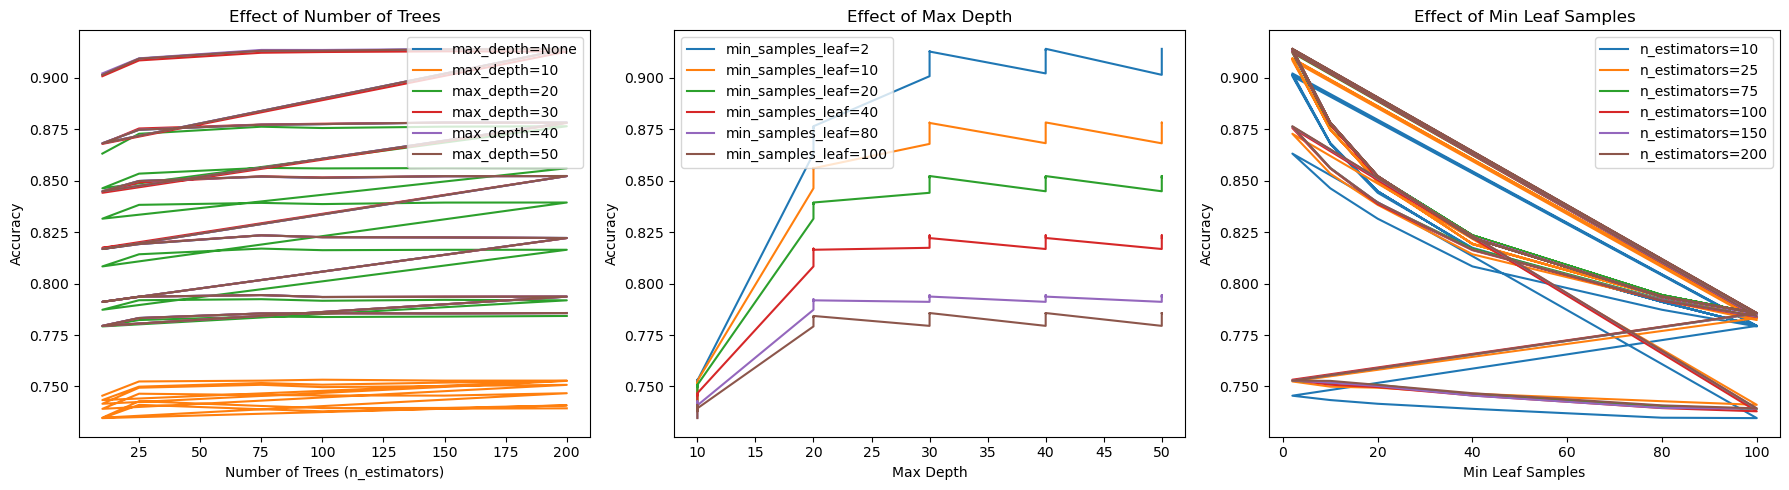

In [22]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Number of Trees
for depth in [None, 10, 20, 30, 40, 50]:
    indices = (results['param_max_depth'].data == depth) & (results['param_criterion'].data == 'entropy')
    axes[0].plot(results['param_n_estimators'].data[indices], 
                 results['mean_test_score'][indices], 
                 label=f'max_depth={depth}')
axes[0].set_xlabel('Number of Trees (n_estimators)')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Effect of Number of Trees')
axes[0].legend()

# Max Depth
for leaf in [2, 10, 20, 40, 80, 100]:
    indices = (results['param_min_samples_leaf'].data == leaf) & (results['param_criterion'].data == 'entropy')
    axes[1].plot(results['param_max_depth'].data[indices], 
                 results['mean_test_score'][indices], 
                 label=f'min_samples_leaf={leaf}')
axes[1].set_xlabel('Max Depth')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Effect of Max Depth')
axes[1].legend()

# Min Leaf Samples
for trees in [10, 25, 75, 100, 150, 200]:
    indices = (results['param_n_estimators'].data == trees) & (results['param_criterion'].data == 'entropy')
    axes[2].plot(results['param_min_samples_leaf'].data[indices], 
                 results['mean_test_score'][indices], 
                 label=f'n_estimators={trees}')
axes[2].set_xlabel('Min Leaf Samples')
axes[2].set_ylabel('Accuracy')
axes[2].set_title('Effect of Min Leaf Samples')
axes[2].legend()

plt.tight_layout()
plt.show()

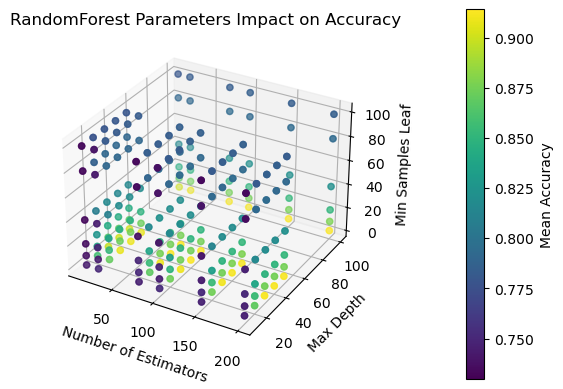

In [38]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


results = grid_search.cv_results_


n_estimators = results['param_n_estimators'].data
max_depth = results['param_max_depth'].data
min_samples_leaf = results['param_min_samples_leaf'].data
scores = results['mean_test_score']


max_depth = np.where(max_depth == None, 100, max_depth)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


scat = ax.scatter(n_estimators, max_depth, min_samples_leaf, c=scores, cmap='viridis')


ax.set_xlabel('Number of Estimators')
ax.set_ylabel('Max Depth')
ax.set_zlabel('Min Samples Leaf')

cbar = plt.colorbar(scat, pad=0.2)  
cbar.set_label('Mean Accuracy')

ax.set_title('RandomForest Parameters Impact on Accuracy')

plt.show()